In [22]:
# -------------------------------- Importações ------------------------------- #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [23]:
# ---------------------------- Importando os dados --------------------------- #
df1 = pd.read_csv('dadosConcentracao.csv', header=None)
df1

,0,1,2
0,0,100,0
1,1,86,7
2,2,84,8
3,3,78,11
4,4,78,11
...,...,...,...
18713,18713,2,49
18714,18714,2,49
18715,18715,2,49
18716,18716,2,49


In [24]:
eixo_x = df1[0].tolist()

In [25]:
# ------------------------- Igualando as porcentagens ------------------------ #
eixo_y1 = df1[1].tolist()
eixo_y2 = df1[2].tolist()

eixo_y2c = []

for i in eixo_y2:
    c = i*2
    eixo_y2c.append(c)

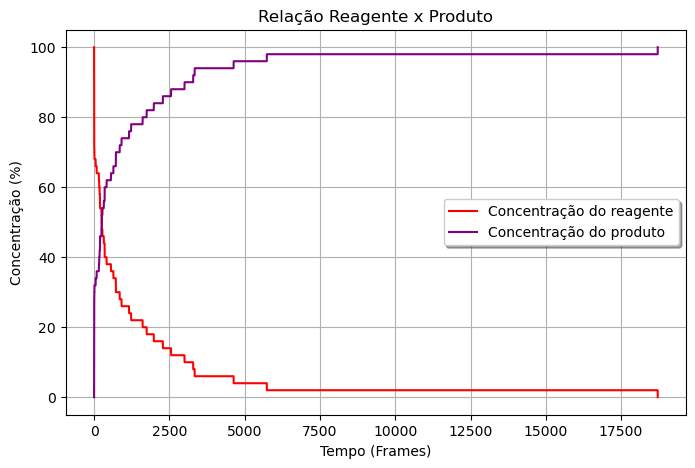

In [26]:
# ---------------------- Plotando os dados da simulação ---------------------- #
plt.figure(figsize=(8,5))

plt.title('Relação Reagente x Produto')

plt.xlabel('Tempo (Frames)')
plt.ylabel('Concentração (%)')

plt.plot(eixo_x, eixo_y1, label='Concentração do reagente', color='red')
plt.plot(eixo_x, eixo_y2c, label='Concentração do produto', color='purple')

plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 

In [27]:
# ---------------- Interpolando os dados com a função BSpline ---------------- #
n = len(eixo_y1)
step = 500
x = range(0,n)[::step]

tck1 = interpolate.splrep(x, eixo_y1[::step], s=20, k=1)
tck2 = interpolate.splrep(x, eixo_y2c[::step], s=20, k=1)

x_new = np.linspace(min(x), max(x), 300)

y1_fit = interpolate.BSpline(*tck1)(x_new)
y2_fit = interpolate.BSpline(*tck2)(x_new)

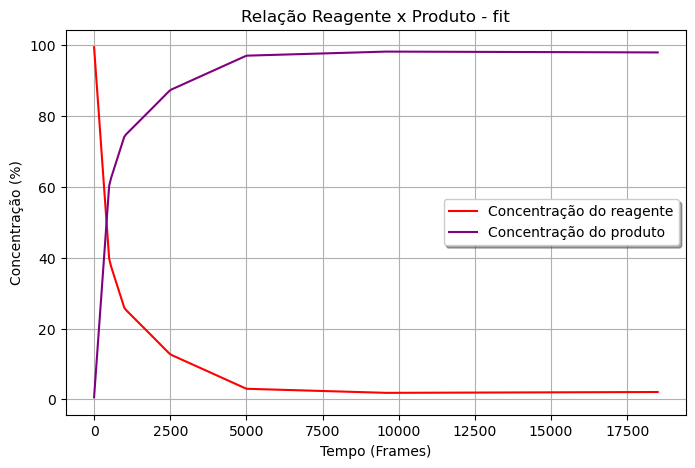

In [28]:
# --------------- Plotando interpolação dos dados da simulação --------------- #
plt.figure(figsize=(8,5))

plt.title('Relação Reagente x Produto - fit')

plt.xlabel('Tempo (Frames)')
plt.ylabel('Concentração (%)')

plt.plot(x_new, y1_fit, label="Concentração do reagente", color='red')
plt.plot(x_new, y2_fit, label="Concentração do produto", color='purple')

plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 